In [1]:
import pandas as pd
import numpy as np
import datetime
import dateutil
from datetime import timedelta
from collections import Counter
pd.set_option('display.max_columns', 500)
import ast
from collections import Counter
import re
from tqdm.notebook import tqdm, tnrange
tqdm.pandas()
import missingno as msno
from collections import Counter
'''
  GRAB THEATRE COUNT
'''
def createDate(row):
  if type(row)==str:
    return dateutil.parser.parse(row).strftime('%Y-%m-%d')
  else:
    return np.nan

/Users/brianphelps/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
'''
  GRAB MOVIE DATA FROM THREADS
'''

def createDf():
  path = "./data//full_"
  paths = ['one', 'two', 'three', 'four', 'five', 'six']
  df = pd.DataFrame()
  for val in paths:
    df = df.append(pd.read_csv(f"{path}{val}.csv"))
  return df

df = createDf()

#DROP INVALID DISTRIBUTOR COLUMNS
df = df.drop(columns=['distributor'])

#DROP MOVIES WITHOUT DEPENDENT VARIABLE DATA
# df.dropna(subset=['box_office'], inplace=True)

#DROP DUPLICATE MOVIES
df = df.drop_duplicates(subset=['profile'])
df = df.reset_index(drop=True)

/Users/brianphelps/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
df.shape

(367802, 42)

In [5]:
drop_columns=['budget','box_office', 'int_office', 'runtime','director_credits','cinematographer','cin_anch','musician','musician_anchor', 'prod_designer', 'prod_designer_anchor','costume_designer','costume_designer_anchor','sequel','screen_writers','screen_anchors','screen_credits','spec_eff','sound_mix','producers','prod_credits','cast_count','comp_count','version_count','references_count']
df=df.drop(columns=drop_columns)

In [8]:
from nltk.tokenize import sent_tokenize 

In [30]:
import re
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return len(sentences)

In [22]:
values = []
for row in df.itertuples():
  
  if type(row.summary)==str:
    result=row.summary
  else:
    result=row.plot

  values.append(result)

In [20]:
values = ['Add a Plot\xa0»','Plot unknown.','The plot is unknown.','Plot kept under wraps.','The plot is unknown at this time.','Plot is unknown.','Plot is unknown at this time.']

for val in values:
  df['summary'] = df['summary'].replace(val, np.nan)

In [24]:
df=df.dropna(subset=['summary'])

In [31]:
df['summary_len']=df['summary'].apply(split_into_sentences)

<AxesSubplot:>

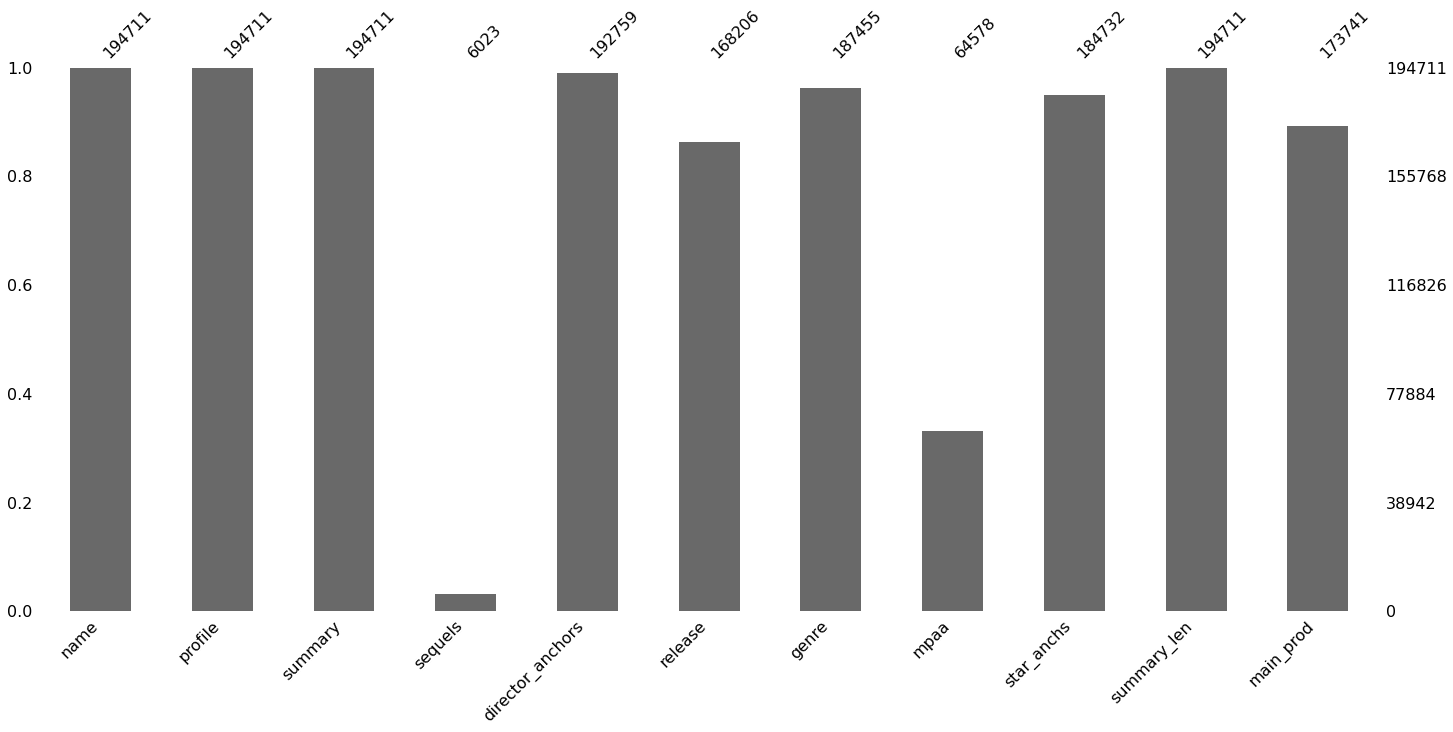

In [52]:
msno.bar(df)

In [ ]:
def mainProd(row):
  try:
    return row[0]
  except:
    return np.nan
tqdm.pandas(desc="Production Company")
import ast
df['main_prod'] = df['pro_comp'].progress_apply(lambda x: ast.literal_eval(x) if type(x)==str else np.nan)
df['main_prod'] = df['main_prod'].progress_apply(mainProd)

In [51]:
df = df.drop(columns=['plot','cast_members','cast_anchors','pro_comp','directors','prod_anchors','stars','languages'])

<AxesSubplot:>

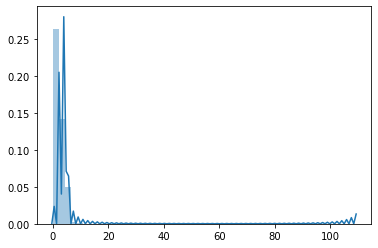

In [34]:
import seaborn as sns
sns.distplot(df['summary_len'].values)

In [36]:
def my_function(data):
  data = data.replace("See full summary\xa0»", "")
  data = data.replace("\n", "")
  data=data.strip()
  return data

In [37]:
df['summary']=df['summary'].apply(my_function)

In [38]:
Counter(df['summary'].dropna()).most_common(30)

[("Hamlet suspects his uncle has murdered his father to claim the throne of Denmark and the hand of Hamlet's mother, but the prince cannot decide whether or not he should take vengeance.",
  13),
 ('Macbeth, the Thane of Glamis, receives a prophecy from a trio of witches that one day he will become King of Scotland. Consumed by ambition and spurred to action by his wife, Macbeth murders his king and takes the throne for himself.',
  11),
 ('The Moorish general Othello is manipulated into thinking that his new wife Desdemona has been carrying on an affair with his lieutenant Michael Cassio when in reality it is all part of the scheme of a bitter ensign named Iago.',
  9),
 ('Two teenagers fall in love, but their feuding families and fate itself cause the relationship to end in tragedy.',
  9),
 ('An orphan named Oliver Twist meets a pickpocket on the streets of London. From there, he joins a household of boys who are trained to steal for their master.',
  8),
 ('Two episodes of the TV s

In [10]:
'''
  CONVERT COLUMNS TO LISTS
'''
import ast

def cleanColumn(row):
  try:
    if type(row)==str:
      values = ast.literal_eval(row)
      if type(values)!=dict:
        cleaned_values=[]
        for val in values:
          val = val.replace(",", "").strip()
          cleaned_values.append(val)
        return cleaned_values
      else:
        return values
    else:
      return np.nan
  except:
    return np.nan

columns = ['sequel',
'cast_members',
'cast_anchors',
'directors',
'director_anchors',
'director_credits',
'pro_comp',
'spec_eff',
'sound_mix',
'stars',
'star_anchs',
'screen_writers',
'screen_anchors',
'screen_credits',
'producers',
'prod_anchors',
'prod_credits',
'genre',
'comp_count',
'cast_count']

for value in tqdm(columns):
  tqdm.pandas(desc="Creating Datetime")
  df[value] = df[value].apply(cleanColumn)

df['cast'] = df['cast_members']
df = df.drop(columns=['cast_members', 'sequels'])

c:\users\brian\anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
'''
  CONVERT DATE INTO ISO FORMAT
'''
def createDates(row):
  if type(row)==str:
    return dateutil.parser.parse(row).strftime('%Y-%m-%d')
  else:
    return np.nan

def createDateTime(row):
  row = row.split("-")
  row = datetime.datetime(int(row[0]), int(row[1]), int(row[2]))
  return row

tqdm.pandas(desc="Creating Date")
df['date'] = df['release'].progress_apply(createDates)
df = df.dropna(subset=['date'])
df = df.reset_index(drop=True)

tqdm.pandas(desc="Creating Datetime")
df['datetime'] = df['date'].progress_apply(createDateTime)
tqdm.pandas(desc="Creating Year Column")
df['year'] = df['datetime'].progress_apply(lambda x: x.year)
tqdm.pandas(desc="Creating Month Column")
df['month'] = df['datetime'].progress_apply(lambda x: x.month)

In [50]:
df['main_prod'][0]

'Lucasfilm'

In [44]:
df['main_prod']

0         [
1         [
2         [
3         [
4         [
         ..
367795    [
367796    [
367798    [
367800    [
367801    [
Name: main_prod, Length: 194711, dtype: object